In [6]:

import os
import numpy as np
import pandas as pd
import sklearn.metrics as sk
import tensorflow as tf
import cv2
import matplotlib
import sklearn.preprocessing as preprocessing

def create_statistics(path_dataset, path_model):
    emotions = os.listdir(path_dataset)
    model = tf.keras.models.load_model(path_model)

    def predicted_emotion(array):
        label_map = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
        return label_map[np.argmax(array)]

    # Predict emotion and get real values -----
    correct_values = []
    predicted_values = []
    for i in emotions:
        for image_path in os.listdir(os.path.join(path_dataset, i)):
            correct_values.append(i)
            image = cv2.imread(os.path.join(path_dataset, i, image_path))
            image = cv2.resize(image, (48, 48))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = image.reshape((1, 48, 48, 1))
            predicted_values.append(predicted_emotion(model.predict(x=image, verbose=0)))

    # Absolute convolution matrix -----
    confusionMatrix = sk.confusion_matrix(y_true=correct_values, y_pred=predicted_values, labels=emotions)
    confusionMatrixDisplay = sk.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,display_labels=emotions)
    confusionMatrixDisplay.plot()
    matplotlib.pyplot.title('Confusion Matrix')
    matplotlib.pyplot.show()
    # Relative convolution matrix -----
    confusionMatrix2 = sk.confusion_matrix(y_true=correct_values, y_pred=predicted_values, labels=emotions, normalize="true")
    confusionMatrixDisplay = sk.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix2,display_labels=emotions)
    confusionMatrixDisplay.plot()
    matplotlib.pyplot.title('Relative Confusion Matrix')
    matplotlib.pyplot.show()

    # precision recall f1-score accuracy for each class -----
    # type(report) == str if you want dictionary ad attributes output_dict = TRUE
    report = sk.classification_report(y_true=correct_values, y_pred=predicted_values, labels=emotions, target_names=emotions, digits=3)
    print(report)

    # absolute numer of wrong predictions -----
    numer_of_wrong_predictions = {}
    for i in emotions:
        numer_of_wrong_predictions[i] = sum(confusionMatrix[:, emotions.index(i)]) - confusionMatrix[emotions.index(i), emotions.index(i)]
    matplotlib.pyplot.bar(numer_of_wrong_predictions.keys(), numer_of_wrong_predictions.values())
    matplotlib.pyplot.xlabel('Emotion')
    matplotlib.pyplot.ylabel('Number of wrong predictions')
    matplotlib.pyplot.show()
    matplotlib.pyplot.title('Number of wrong predictions')
    matplotlib.pyplot.show()

    # relative number of wrong predictions -----
    numer_of_wrong_predictions = {}
    for i in emotions:
        numer_of_wrong_predictions[i] = (sum(confusionMatrix[:, emotions.index(i)]) - confusionMatrix[emotions.index(i), emotions.index(i)]) / sum(confusionMatrix[:, emotions.index(i)])
    matplotlib.pyplot.bar(numer_of_wrong_predictions.keys(), numer_of_wrong_predictions.values())
    matplotlib.pyplot.xlabel('Emotion')
    matplotlib.pyplot.ylabel('Number of wrong predictions')
    matplotlib.pyplot.title('Number of wrong predictions relative to all predictions by class')
    matplotlib.pyplot.show()

    # change labels to numerical values -----
    label_encoder = preprocessing.LabelEncoder()
    correct_values_numeric = label_encoder.fit_transform(correct_values)
    predicted_values_numeric = label_encoder.fit_transform(predicted_values)

    # Receiver Operating Characteristic -----
    falsePositiveRate = []
    truePositiveRate = []
    areaUnderGraph = []
    for i in emotions:
        fp, tp, _ = sk.roc_curve(correct_values_numeric, predicted_values_numeric, pos_label=emotions.index(i))
        falsePositiveRate.append(fp)
        truePositiveRate.append(tp)
        areaUnderGraph.append(sk.auc(fp, tp))
    for i in emotions:
        matplotlib.pyplot.plot(falsePositiveRate[emotions.index(i)],truePositiveRate[emotions.index(i)], label=f'{i}, area = {areaUnderGraph[emotions.index(i)]:.2f}')
    matplotlib.pyplot.legend(loc='lower right')
    matplotlib.pyplot.xlabel('False Positive Rate')
    matplotlib.pyplot.ylabel('True Positive Rate')
    matplotlib.pyplot.title('Receiver Operating Characteristic')
    matplotlib.pyplot.show()




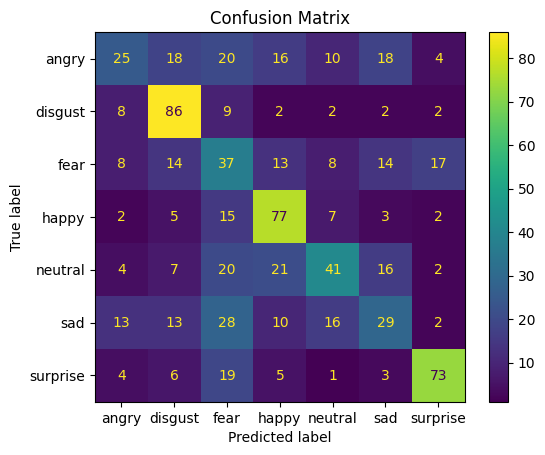

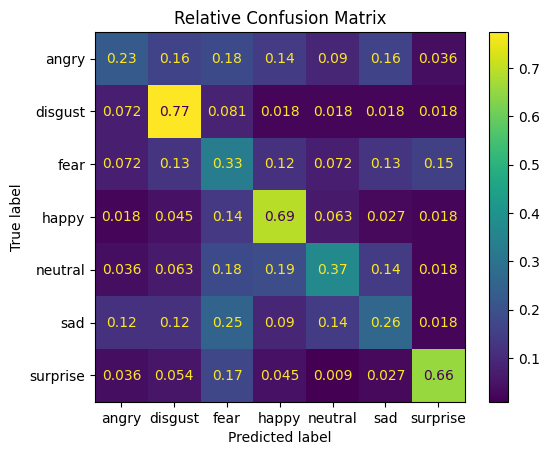

              precision    recall  f1-score   support

       angry      0.391     0.225     0.286       111
     disgust      0.577     0.775     0.662       111
        fear      0.250     0.333     0.286       111
       happy      0.535     0.694     0.604       111
     neutral      0.482     0.369     0.418       111
         sad      0.341     0.261     0.296       111
    surprise      0.716     0.658     0.685       111

    accuracy                          0.474       777
   macro avg      0.470     0.474     0.462       777
weighted avg      0.470     0.474     0.462       777


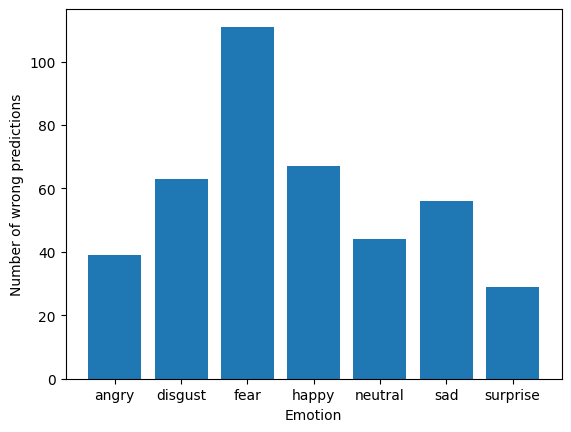

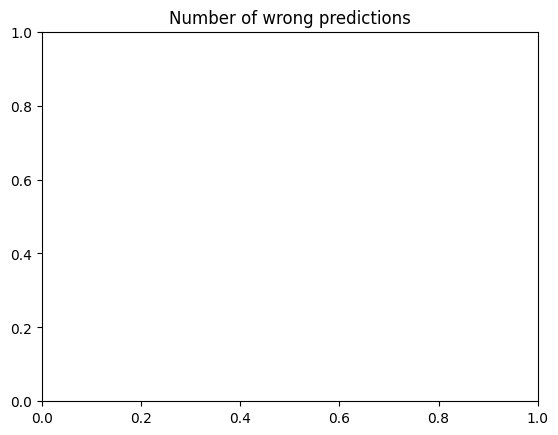

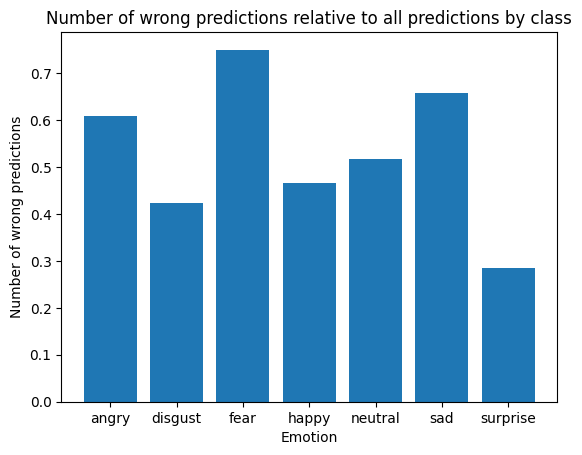

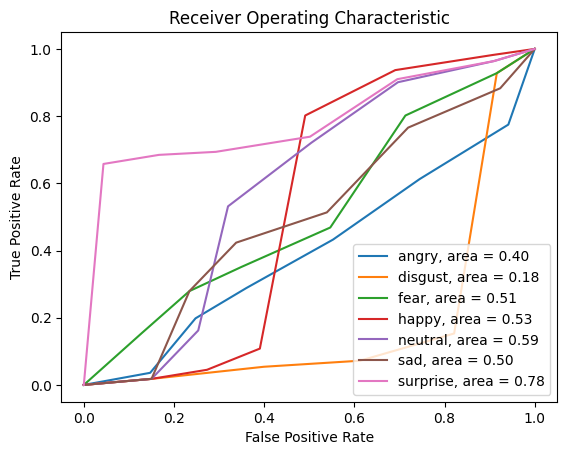

In [7]:
create_statistics(path_dataset="../FER2013_ver2/test", path_model="./model2_CNN")